In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_path="Amazon Sale Report.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1')

In [3]:
print(data.columns)

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')


In [4]:
print(data.isnull().sum())

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64


In [10]:
data.drop(['New',"PendingS"], axis=1, inplace=True)

In [11]:
status_mapping = {
    'Cancelled': 'Cancelled',
    'Shipped - Delivered to Buyer': 'Delivered',
    'Pending - Waiting for Pick Up':'Awaiting Pickup',
    'Pending': 'Awaiting Shipment',
    'Shipped': 'Shipped',
    'Shipped - Picked Up': 'Picked up',
    'Shipped - Damaged': 'Damaged in Transit',
    'Shipped - Lost in Transit': 'Lost in Transit',
    'Shipped - Returned to Seller': 'Shipment Returned',
    'Shipped - Returning to Seller': 'Returning to Seller',
    'Shipped - Rejected by Buyer': 'Rejected by Buyer',
    'Shipping':'Shipped',
    'Shipped - Out for Delivery':'Out for delivery'

}

# Update the 'Courier Status' based on the mapping
data['Courier Status'] = data['Status'].map(status_mapping)

# rows for each status category
for status in status_mapping.keys():
    filtered_data = data[data['Status'] == status]
    if not filtered_data.empty:  # Check if there's any data to display
        print(filtered_data[['Order ID', 'Status', 'Courier Status']].head())
        print("-----")

               Order ID     Status Courier Status
0   405-8078784-5731545  Cancelled      Cancelled
3   403-9615377-8133951  Cancelled      Cancelled
8   407-5443024-5233168  Cancelled      Cancelled
23  404-6019946-2909948  Cancelled      Cancelled
29  404-5933402-8801952  Cancelled      Cancelled
-----
               Order ID                        Status Courier Status
1   171-9198151-1101146  Shipped - Delivered to Buyer      Delivered
7   406-7807733-3785945  Shipped - Delivered to Buyer      Delivered
12  405-5513694-8146768  Shipped - Delivered to Buyer      Delivered
14  408-1298370-1920302  Shipped - Delivered to Buyer      Delivered
15  403-4965581-9520319  Shipped - Delivered to Buyer      Delivered
-----
                  Order ID                         Status   Courier Status
91975  404-6911461-8829111  Pending - Waiting for Pick Up  Awaiting Pickup
91978  171-3656048-9425164  Pending - Waiting for Pick Up  Awaiting Pickup
91981  403-7879928-4775516  Pending - Waiting for

In [12]:
data.loc[data['Courier Status']=='Cancelled','fulfilled-by']='Cancelled'
print(data[['Order ID', 'Status', 'fulfilled-by']])

data.loc[data['Courier Status']=='Awaiting Shipment','fulfilled-by']='Amazon'
print(data[['Order ID', 'Status', 'fulfilled-by']])

data.loc[(data['Status'] == 'Shipped') & (data['Courier Status'] == 'Shipped') & (data['Fulfilment'] == 'Amazon'), 'fulfilled-by'] = 'Amazon'
print(data[['Order ID', 'Status', 'Courier Status', 'Fulfilment', 'fulfilled-by']])


data.loc[(data['Status'] == 'Shipped - Damaged') & (data['Courier Status'] == 'Damaged in Transit') & (data['Fulfilment'] == 'Merchant'), 'fulfilled-by'] = 'Merchant'


print(data[['Order ID', 'Status', 'Courier Status', 'Fulfilment', 'fulfilled-by']])


data.loc[(data['Status'] == 'Shipped - Lost in Transit') & (data['Courier Status'] == 'Lost in Transit') & (data['Fulfilment'] == 'Merchant'), 'fulfilled-by'] = 'Merchant'


print(data[['Order ID', 'Status', 'Courier Status', 'Fulfilment', 'fulfilled-by']])



data.loc[(data['Status'] == 'Shipped - Picked Up') &
         (data['Courier Status'] == 'Picked Up') &
         (data['Fulfilment'] == 'Amazon'), 'fulfilled-by'] = 'Amazon'

# Fulfilled by Merchant
data.loc[(data['Status'] == 'Shipped - Picked Up') &
         (data['Courier Status'] == 'Picked Up') &
         (data['Fulfilment'] == 'Merchant'), 'fulfilled-by'] = 'Merchant'


print(data[['Order ID', 'Status', 'Courier Status', 'Fulfilment', 'fulfilled-by']])


# Fulfilled by Amazon
data.loc[(data['Status'] == 'Shipped - Out for Delivery') &
         (data['Courier Status'] == 'Shipped') &
         (data['Fulfilment'] == 'Amazon'), 'fulfilled-by'] = 'Amazon'

# Fulfilled by Merchant
data.loc[(data['Status'] == 'Shipped - Out for Delivery') &
         (data['Courier Status'] == 'Shipped') &
         (data['Fulfilment'] == 'Merchant'), 'fulfilled-by'] = 'Merchant'


print(data[['Order ID', 'Status', 'Courier Status', 'Fulfilment', 'fulfilled-by']])

# Fulfilled by Amazon
data.loc[(data['Status'] == 'Shipped - Delivered to Buyer') &
         (data['Courier Status'] == 'Delivered') &
         (data['Fulfilment'] == 'Amazon'), 'fulfilled-by'] = 'Amazon'

# Fulfilled by Merchant
data.loc[(data['Status'] == 'Shipped - Delivered to Buyer') &
         (data['Courier Status'] == 'Delivered') &
         (data['Fulfilment'] == 'Merchant'), 'fulfilled-by'] = 'Merchant'


print(data[['Order ID', 'Status', 'Courier Status', 'Fulfilment', 'fulfilled-by']])


# Fulfilled by Amazon
data.loc[(data['Status'] == 'Shipped - Returned to Seller') &
         (data['Courier Status'] == 'Shipment Returned') &
         (data['Fulfilment'] == 'Amazon'), 'fulfilled-by'] = 'Amazon'

# Fulfilled by Merchant
data.loc[(data['Status'] == 'Shipped - Returned to Seller') &
         (data['Courier Status'] == 'Shipment Returned') &
         (data['Fulfilment'] == 'Merchant'), 'fulfilled-by'] = 'Merchant'


print(data[['Order ID', 'Status', 'Courier Status', 'Fulfilment', 'fulfilled-by']])



# Fulfilled by Amazon
data.loc[(data['Status'] == 'Shipped - Returning to Seller') &
         (data['Courier Status'] == 'Returning to Seller') &
         (data['Fulfilment'] == 'Amazon'), 'fulfilled-by'] = 'Amazon'

# Fulfilled by Merchant
data.loc[(data['Status'] == 'Shipp - Returning to Seller') &
         (data['Courier Status'] == 'Returning to Seller') &
         (data['Fulfilment'] == 'Merchant'), 'fulfilled-by'] = 'Merchant'


print(data[['Order ID', 'Status', 'Courier Status', 'Fulfilment', 'fulfilled-by']])

data.loc[(data['Status'] == 'shipping')& (data['Courier Status'] == 'shipped') & (data['Fulfilment'] == 'Amazon'), 'fulfilled-by'] = 'Amazon'

# Fulfilled by Merchant
data.loc[(data['Status'] == 'shipping') & (data['Courier Status'] == 'shipped') & (data['Fulfilment'] == 'Merchant'), 'fulfilled-by'] = 'Merchant'


print(data[['Order ID', 'Status', 'Courier Status', 'Fulfilment', 'fulfilled-by']])

data.loc[(data['Status'] == 'Shipping') & (data['Courier Status'] == 'Unshipped'), 'Courier Status'] = 'Shipped'

# Set fulfilled-by based on Fulfilment type
# Fulfilled by Amazon
data.loc[(data['Status'] == 'Shipping') & (data['Fulfilment'] == 'Amazon'), 'fulfilled-by'] = 'Amazon'

# Fulfilled by Merchant
data.loc[(data['Status'] == 'Shipping') & (data['Fulfilment'] == 'Merchant'), 'fulfilled-by'] = 'Merchant'


print(data[['Order ID', 'Status', 'Courier Status', 'Fulfilment', 'fulfilled-by']])


                   Order ID                        Status fulfilled-by
0       405-8078784-5731545                     Cancelled    Cancelled
1       171-9198151-1101146  Shipped - Delivered to Buyer     Merchant
2       404-0687676-7273146                       Shipped       Amazon
3       403-9615377-8133951                     Cancelled    Cancelled
4       407-1069790-7240320                       Shipped       Amazon
...                     ...                           ...          ...
128971  406-6001380-7673107                       Shipped       Amazon
128972  402-9551604-7544318                       Shipped       Amazon
128973  407-9547469-3152358                       Shipped       Amazon
128974  402-6184140-0545956                       Shipped       Amazon
128975  408-7436540-8728312                       Shipped       Amazon

[128976 rows x 3 columns]
                   Order ID                        Status fulfilled-by
0       405-8078784-5731545                     Ca

In [13]:
print(data.isnull().sum())

index                    0
Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Category                 0
Size                     0
Courier Status           0
Qty                      0
currency              7800
Amount                7800
ship-city               35
ship-state              35
ship-postal-code        35
ship-country            35
B2B                      0
fulfilled-by             0
dtype: int64


In [14]:
data['Order ID'] = data['Order ID'].astype(str).str.strip()
data['ship-state'] = data['ship-state'].astype(str).str.strip()
data['ship-city'] = data['ship-city'].astype(str).str.strip()
data['ship-postal-code'] = data['ship-postal-code'].astype(str).str.strip()
data['ship-country'] = data['ship-country'].astype(str).str.strip()

print("Missing values after filling and before replacing :")

Missing values after filling and before replacing :


In [15]:
print(data.isnull().sum())

index                    0
Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Category                 0
Size                     0
Courier Status           0
Qty                      0
currency              7800
Amount                7800
ship-city                0
ship-state               0
ship-postal-code         0
ship-country             0
B2B                      0
fulfilled-by             0
dtype: int64


In [16]:
fill_value="INR"
data['currency'].fillna('INR', inplace=True)
print(data.isnull().sum())


index                    0
Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Category                 0
Size                     0
Courier Status           0
Qty                      0
currency                 0
Amount                7800
ship-city                0
ship-state               0
ship-postal-code         0
ship-country             0
B2B                      0
fulfilled-by             0
dtype: int64


<ipython-input-16-d7926d199725>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['currency'].fillna('INR', inplace=True)


In [17]:
data['Amount'] = data.groupby('Category')['Amount'].transform(lambda x: x.fillna(x.mean()))
print(data.isnull().sum())

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64


In [18]:
data = pd.DataFrame(data)
total_sales = data['Amount'].sum()
average_order_value = data['Amount'].mean()

print(f"Total Sales: {total_sales}")
print(f"Average Order Value: {average_order_value}")

Total Sales: 83668606.7739221
Average Order Value: 648.714542038225


In [19]:
aggregated_orders = data.groupby('Order ID')['Amount'].sum().reset_index()
print(aggregated_orders)

                   Order ID      Amount
0       171-0000547-8192359  301.000000
1       171-0000902-4490745  544.000000
2       171-0001409-6228339  422.000000
3       171-0003082-5110755  563.000000
4       171-0003738-2052324  379.000000
...                     ...         ...
120224  S02-9578181-3610412  833.317534
120225  S02-9599483-2736812  833.317534
120226  S02-9649067-3246849  455.928116
120227  S02-9736323-0094708  455.928116
120228  S02-9878098-5959538  833.317534

[120229 rows x 2 columns]


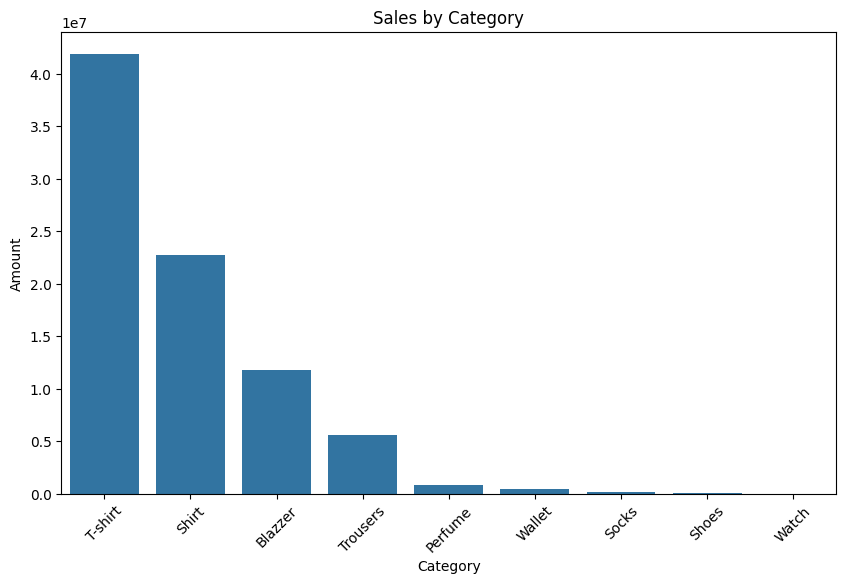

In [20]:
category_sales = data.groupby('Category')['Amount'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales, x='Category', y='Amount')
plt.xticks(rotation=45)
plt.title("Sales by Category")
plt.show()

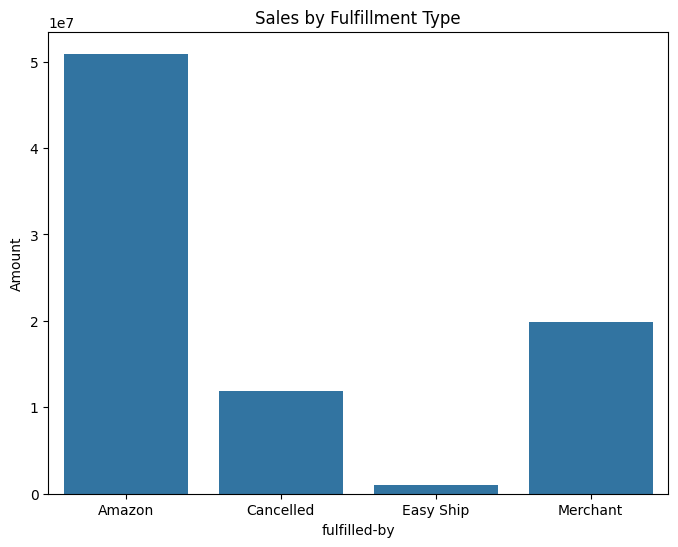

In [21]:
fulfillment_sales = data.groupby('fulfilled-by')['Amount'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=fulfillment_sales, x='fulfilled-by', y='Amount')
plt.title("Sales by Fulfillment Type")
plt.show()


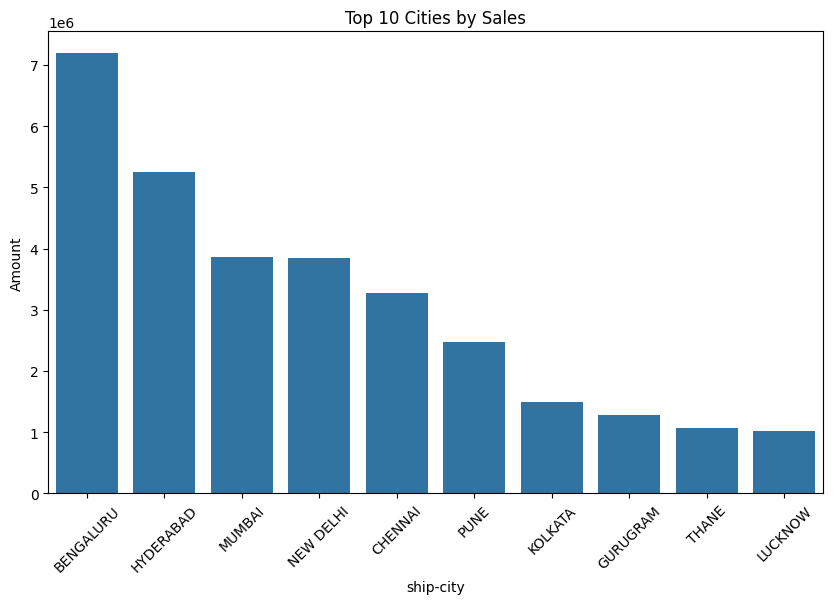

In [22]:
city_sales = data.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=city_sales, x='ship-city', y='Amount')
plt.xticks(rotation=45)
plt.title("Top 10 Cities by Sales")
plt.show()


In [23]:
return_data = data[data['Courier Status'].isin(['Lost in Transit', 'Shipment Returned', 'Damaged in Transit'])]
total_loss = return_data['Amount'].sum()
print(f"Total Loss due to Returns and Damages: {total_loss}")


Total Loss due to Returns and Damages: 1275753.3033997142


In [24]:
repeat_customers_by_postal_code = data.groupby('ship-postal-code')['Order ID'].nunique().reset_index()
repeat_customers_by_postal_code.columns = ['ship-postal-code', 'Order Count']
repeat_customers_by_postal_code = repeat_customers_by_postal_code[repeat_customers_by_postal_code['Order Count'] > 1]

print("Repeat Purchases by Postal Code:")
print(repeat_customers_by_postal_code)

Repeat Purchases by Postal Code:
     ship-postal-code  Order Count
0            110001.0           48
1            110002.0           36
2            110003.0           62
4            110005.0           65
5            110006.0           37
...               ...          ...
9445         855107.0            7
9446         855108.0            2
9447         855113.0            9
9448         855115.0            2
9454              nan           28

[6747 rows x 2 columns]


In [25]:
average_order_frequency_by_postal_code = data.groupby('ship-postal-code')['Order ID'].nunique().mean()

print(f"Average Order Frequency per Postal Code: {average_order_frequency_by_postal_code:.2f}")

Average Order Frequency per Postal Code: 12.72


In [26]:
courier_status_counts = data['Courier Status'].value_counts()
courier_status_percentages = data['Courier Status'].value_counts(normalize=True) * 100

In [27]:
courier_status_summary = pd.DataFrame({
    'Count': courier_status_counts,
    'Percentage': courier_status_percentages
})

# Display the summary DataFrame
print("Courier Status Breakdown:")
print(courier_status_summary)

Courier Status Breakdown:
                     Count  Percentage
Courier Status                        
Shipped              77823   60.339133
Delivered            28756   22.295621
Cancelled            18334   14.215048
Shipment Returned     1954    1.515011
Picked up              973    0.754404
Awaiting Shipment      658    0.510172
Awaiting Pickup        281    0.217870
Returning to Seller    145    0.112424
Out for delivery        35    0.027137
Rejected by Buyer       11    0.008529
Lost in Transit          5    0.003877
Damaged in Transit       1    0.000775


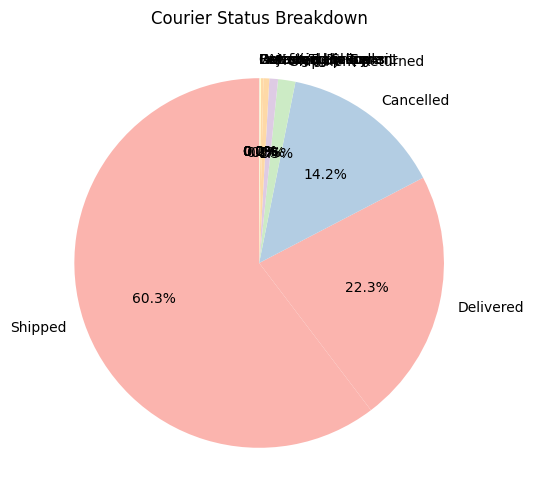

In [28]:
plt.figure(figsize=(8, 6))
courier_status_summary['Percentage'].plot.pie(autopct='%1.1f%%', startangle=90, cmap='Pastel1')
plt.ylabel('')  # Hide y-label for aesthetics
plt.title("Courier Status Breakdown")
plt.show()
